# Bagging Machine Learning Algorithm

### **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.

In [25]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.shape

(891, 15)

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
#df.dropna(inplace=True)

In [7]:
df['pclass'].unique()

array([3, 1, 2])

In [8]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [9]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [10]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

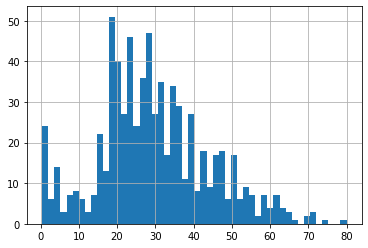

In [11]:
df['age'].hist(bins=50);

## Data Pre-processing

In [12]:
subset = df[['pclass', 'sex', 'age','survived']].copy()
subset.dropna(inplace=True)

In [13]:
X = subset[['pclass', 'sex', 'age']].copy()

In [14]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [15]:
X['sex'] = lb.fit_transform(X['sex'])

In [16]:
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [17]:
X.shape

(714, 3)

In [18]:
X.describe()

,pclass,sex,age
count,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118
std,0.838250,0.481921,14.526497
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.125000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  714 non-null    int64  
 1   sex     714 non-null    int64  
 2   age     714 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.3 KB


In [20]:
y = subset['survived'].copy()

In [21]:
y.value_counts()

0    424
1    290
Name: survived, dtype: int64

***

# Random Forest

[paper](http://ect.bell-labs.com/who/tkh/publications/papers/odt.pdf)

* Ensemble of Decision Trees

* Training via the bagging method (Repeated sampling with replacement)
  * Bagging: Sample from samples
  * RF: Sample from predictors. $m=sqrt(p)$ for classification and $m=p/3$ for regression problems.

* Utilise uncorrelated trees

Random Forest
* Sample both observations and features of training data

Bagging
* Samples only observations at random
* Decision Tree select best feature when splitting a node

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [29]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

In [30]:
rf_clf = RandomForestClassifier(random_state=42,n_estimators=100)

In [31]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [33]:
print_score(rf_clf, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.8941

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       378
           1       0.92      0.81      0.86       264

    accuracy                           0.89       642
   macro avg       0.90      0.88      0.89       642
weighted avg       0.90      0.89      0.89       642


Confusion Matrix: 
 [[359  19]
 [ 49 215]]

ROC AUC: 0.8821

Average Accuracy: 	 0.7944
Accuracy SD: 		 0.0501


In [34]:
print_score(rf_clf, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.8750

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.83      0.89        46
           1       0.76      0.96      0.85        26

    accuracy                           0.88        72
   macro avg       0.87      0.89      0.87        72
weighted avg       0.90      0.88      0.88        72


Confusion Matrix: 
 [[38  8]
 [ 1 25]]

ROC AUC: 0.8938



## Grid Search

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
rf_clf = RandomForestClassifier(random_state=42)

In [38]:
params_grid = {"max_depth": [3, None],
               "min_samples_split": [2, 3, 10],
               "min_samples_leaf": [1, 3, 10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']}

In [39]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5,
                           verbose=1, scoring='accuracy')

In [40]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    6.6s finished
/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bo

In [41]:
grid_search.best_score_

0.7990654205607477

In [42]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [43]:
print_score(grid_search, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.8505

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       378
           1       0.85      0.77      0.81       264

    accuracy                           0.85       642
   macro avg       0.85      0.84      0.84       642
weighted avg       0.85      0.85      0.85       642


Confusion Matrix: 
 [[343  35]
 [ 61 203]]

ROC AUC: 0.8382

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.8s finished
/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.4s finished
/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.8s finished
/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.5s finished
/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.5s finished
/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.6s finished
/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.1s finished
/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.5s finished
/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.8s finished
/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s


Average Accuracy: 	 0.7819
Accuracy SD: 		 0.0394


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.1s finished
/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
print_score(grid_search, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.9028

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.87      0.92        46
           1       0.81      0.96      0.88        26

    accuracy                           0.90        72
   macro avg       0.89      0.92      0.90        72
weighted avg       0.91      0.90      0.90        72


Confusion Matrix: 
 [[40  6]
 [ 1 25]]

ROC AUC: 0.9156



***

# Extra-Trees (Extremely Randomized Trees) Ensemble

[scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html#bagging)

* Random Forest is build upon Decision Tree
* Decision Tree node splitting is based on gini or entropy or some other algorithms
* Extra-Trees make use of random thresholds for each feature unlike Decision Tree


In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
xt_clf = ExtraTreesClassifier(random_state=42)

In [47]:
xt_clf.fit(X_train, y_train)

/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [49]:
print_score(xt_clf, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.8941

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.91       378
           1       0.95      0.79      0.86       264

    accuracy                           0.89       642
   macro avg       0.91      0.88      0.89       642
weighted avg       0.90      0.89      0.89       642


Confusion Matrix: 
 [[366  12]
 [ 56 208]]

ROC AUC: 0.8781

Average Accuracy: 	 0.7850
Accuracy SD: 		 0.0500


In [50]:
print_score(xt_clf, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.8889

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.85      0.91        46
           1       0.78      0.96      0.86        26

    accuracy                           0.89        72
   macro avg       0.88      0.90      0.88        72
weighted avg       0.91      0.89      0.89        72


Confusion Matrix: 
 [[39  7]
 [ 1 25]]

ROC AUC: 0.9047



***

In [51]:
def eval_gini(y_true, y_prob):
    """
    Original author CPMP : https://www.kaggle.com/cpmpml
    In kernel : https://www.kaggle.com/cpmpml/extremely-fast-gini-computation
    """
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

***